In [2]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 6.2 MB/s eta 0:00:25
    --------------------------------------- 2.6/150.0 MB 6.3 MB/s eta 0:00:24
   - -------------------------------------- 3.9/150.0 MB 6.1 MB/s eta 0:00:25
   - -------------------------------------- 5.2/150.0 MB 6.1 MB/s eta 0:00:24
   - -------------------------------------- 6.6/150.0 MB 6.2 MB/s eta 0:00:24
   -- ------------------------------------- 7.9/150.0 MB 6.1 MB/s eta 0:00:24
   -- ------------------------------------- 8.9/150.0 MB 5.9 MB/s eta 0:00:24
   -- ------------------------------------- 10.2/150.0 MB 6.0 MB/s eta 0:00:24
   --- ------------------------------------ 11.3/150.0 MB 5.9 MB/s eta 0:00:24
   --- ------------------------------------ 12.6/150.0 MB 5.9 MB/s eta 0:00:24
   --- ------------------------------------ 13.9/150.0 MB 6.0 MB/s eta 0:00

In [4]:
# Step 1: Import required libraries
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Grocery_Feature_Engineered.csv")
df.head()

,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,days_to_expiry,Status_encoded,Catagory_encoded,Final_Price
0,22,72,70,4.5,32,19,34,2,4,4.050
1,30,38,83,6.0,31,34,50,1,4,5.400
2,37,30,74,4.0,62,25,94,1,3,4.000
3,96,52,16,2.5,67,13,94,0,5,2.500
4,44,90,17,2.5,21,91,2,2,2,1.125


Root Mean Squared Error (RMSE): 0.3329145456705698
R-squared Score (R²): 0.9805143294587161


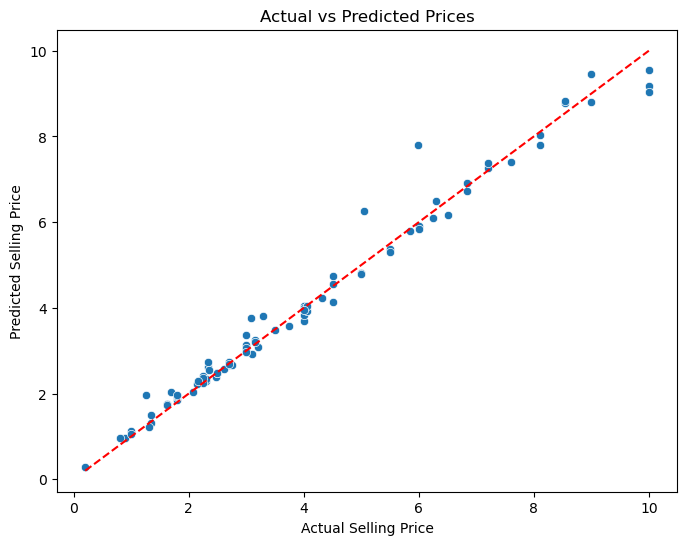

In [5]:
# Set your features (X) and target (y)
X = df.drop(columns=["Final_Price"])   # drop target from features
y = df["Final_Price"]                  # this is your label/target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Create the model with basic parameters
model = XGBRegressor(
    n_estimators=100,     # number of trees
    learning_rate=0.1,    # step size shrinkage
    max_depth=6,          # how deep each tree grows
    subsample=0.8,        # percentage of samples used per tree
    colsample_bytree=0.8, # percentage of features used per tree
    random_state=42
)

# Train the model
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate using RMSE and R² Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # perfect line
plt.show()



In [6]:
comparison_df = pd.DataFrame({
    "Actual_Price": y_test.values,
    "Predicted_Price": y_pred
})

# Round prices for better readability
comparison_df = comparison_df.round(2)

# Display the top 20 rows (you can change to 50 or full if needed)
comparison_df.head(20)

,Actual_Price,Predicted_Price
0,2.70,2.73
1,1.80,1.85
2,3.20,3.09
3,2.25,2.26
4,4.00,3.69
5,9.00,9.45
6,5.50,5.38
7,1.35,1.31
8,2.30,2.29
9,4.00,3.84
